In [1]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [2]:
import pandas as pd
import numpy as np
GAS = pd.read_csv("gas_turbines.csv")

In [3]:
GAS.shape

(15039, 11)

In [ ]:
GAS.isna().sum()

In [ ]:
GAS.describe()

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(GAS)

Output hidden; open in https://colab.research.google.com to view.

<Axes: xlabel='AFDP', ylabel='TEY'>

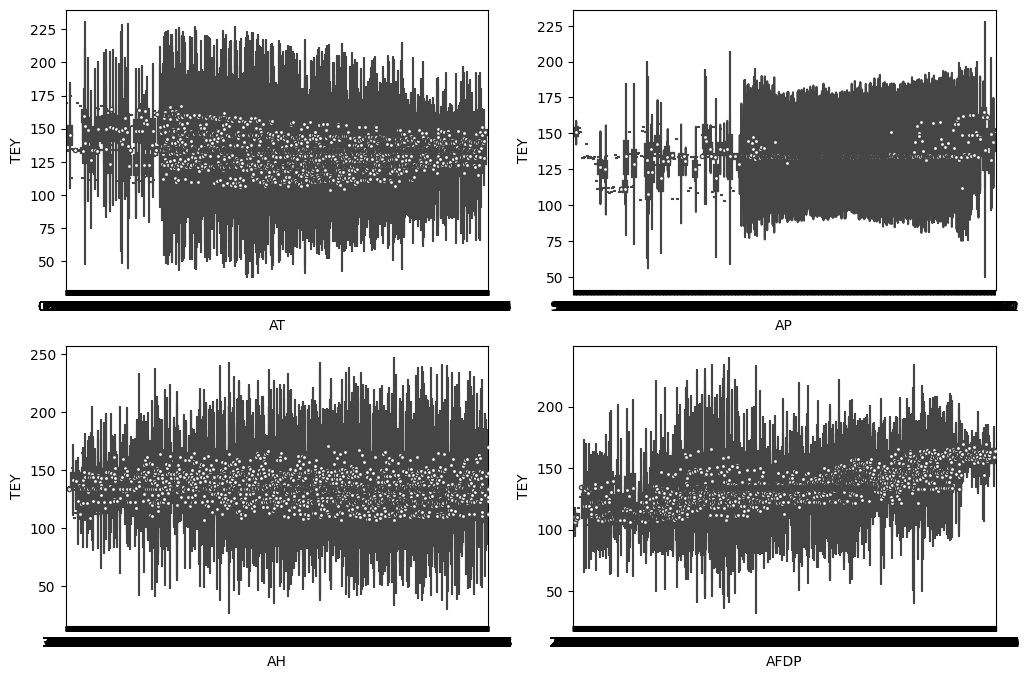

In [9]:
f, axes = plt.subplots(2, 2, figsize=(12,8))

sns.violinplot(x = 'AT', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.violinplot(x = 'AP', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.violinplot(x = 'AH', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.violinplot(x = 'AFDP', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[1,1])

<Axes: xlabel='CDP', ylabel='TEY'>

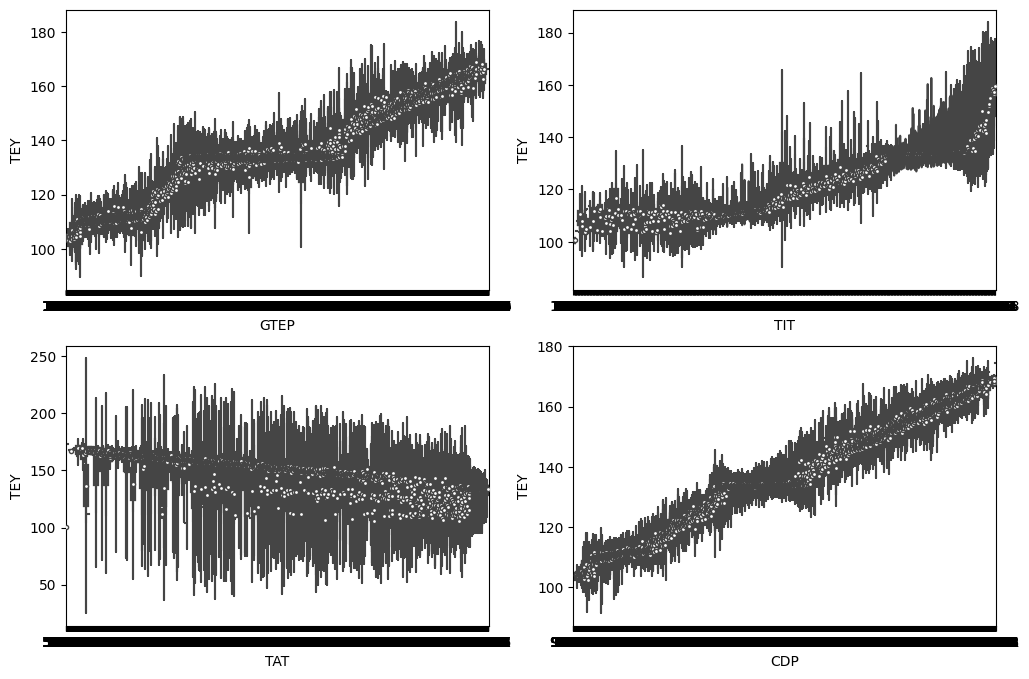

In [10]:
f, axes = plt.subplots(2, 2, figsize=(12,8))
sns.violinplot(x = 'GTEP', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[0,0])
sns.violinplot(x = 'TIT', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[0,1])
sns.violinplot(x = 'TAT', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[1,0])
sns.violinplot(x = 'CDP', y = 'TEY', data = GAS, scatter_kws={'alpha':0.6}, ax = axes[1,1])

Neural Network :

In [26]:
np.random.seed(9)
# Split the X and Y variables
X = GAS.drop(['TEY'], axis = 1)
Y = GAS['TEY']
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [28]:
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [27]:
# Create the Model
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(26, input_dim = 10, activation ='relu',)) # 1st layer
model.add(Dense(26, activation ='tanh')) # 2nd layer
model.add(Dense(26, activation ='sigmoid')) # 3rd layer
model.add(Dense(26, activation ='leaky_relu')) # 4th layer

In [29]:
# Compile Model
model.compile(loss='mse', optimizer ='adam', metrics=['mean_absolute_percentage_error'])

In [30]:
# Fit the Model
His = model.fit(X,Y, validation_split=0.33, epochs = 20, batch_size =10)

Epoch 1/20
1008/1008 [==============================] - 4s 3ms/step - loss: 14863.4717 - mean_absolute_percentage_error: 88.9308 - val_loss: 10900.2539 - val_mean_absolute_percentage_error: 77.9786
Epoch 2/20
1008/1008 [==============================] - 3s 3ms/step - loss: 9212.5752 - mean_absolute_percentage_error: 69.3280 - val_loss: 6508.5322 - val_mean_absolute_percentage_error: 59.4927
Epoch 3/20
1008/1008 [==============================] - 4s 4ms/step - loss: 5414.1899 - mean_absolute_percentage_error: 52.2166 - val_loss: 3542.7903 - val_mean_absolute_percentage_error: 42.8331
Epoch 4/20
1008/1008 [==============================] - 3s 3ms/step - loss: 2888.2480 - mean_absolute_percentage_error: 36.8148 - val_loss: 1687.9242 - val_mean_absolute_percentage_error: 27.9422
Epoch 5/20
1008/1008 [==============================] - 3s 2ms/step - loss: 1364.2911 - mean_absolute_percentage_error: 23.3240 - val_loss: 696.2867 - val_mean_absolute_percentage_error: 15.5313
Epoch 6/20
1008/100

In [31]:
# Evaluate the Model
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]))

470/470 [==============================] - 1s 2ms/step - loss: 251.5114 - mean_absolute_percentage_error: 8.8210
mean_absolute_percentage_error: 8.82%


In [32]:
model.metrics_names

['loss', 'mean_absolute_percentage_error']

In [33]:
scores

[251.5113525390625, 8.820991516113281]

In [34]:
His.history.keys()

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])

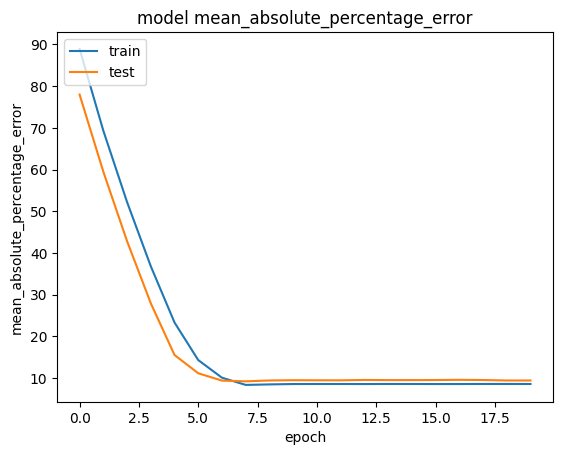

In [36]:
plt.plot(His.history['mean_absolute_percentage_error'])
plt.plot(His.history['val_mean_absolute_percentage_error'])
plt.title('model mean_absolute_percentage_error')
plt.ylabel('mean_absolute_percentage_error')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

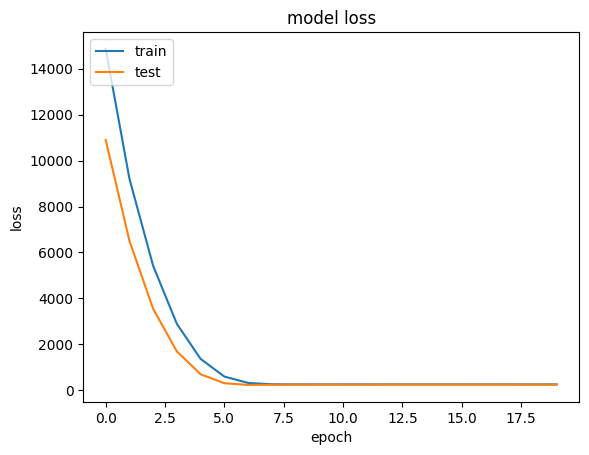

In [37]:
plt.plot(His.history['loss'])
plt.plot(His.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()